## Library Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

## Data Cleaning, Filtering and Transforming

In [ ]:
df = pd.read_csv("/content/combined demographic.csv")
df.drop("Combined Key",inplace=True,axis=1)
df.head()

,Unique CSD,Unique Year,Adjusted Air Quality Health Index,Both Sexes Life Expectancy (Years),Population
0,Red Deer,2011,2.74906,79.96,75553
1,Red Deer,2012,2.43250,80.00,77674
2,Red Deer,2013,2.54466,80.17,79180
3,Red Deer,2014,2.23417,80.20,80290
4,Red Deer,2015,2.26231,80.37,80049


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unique CSD                          284 non-null    object 
 1   Unique Year                         284 non-null    int64  
 2   Combined Key                        284 non-null    object 
 3   Adjusted Air Quality Health Index   284 non-null    float64
 4   Both Sexes Life Expectancy (Years)  267 non-null    float64
 5   Population                          284 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 13.4+ KB


In [ ]:
df.isna().sum().sort_values(ascending=False)

,0
Both Sexes Life Expectancy (Years),17
Unique CSD,0
Unique Year,0
Combined Key,0
Adjusted Air Quality Health Index,0
Population,0


In [ ]:
global_mean_life_expectancy = df['Both Sexes Life Expectancy (Years)'].mean()
grouped_life_expectancy = df.groupby('Unique CSD')['Both Sexes Life Expectancy (Years)'].transform('mean')
df['Both Sexes Life Expectancy (Years)'] = df['Both Sexes Life Expectancy (Years)'].fillna(grouped_life_expectancy).fillna(global_mean_life_expectancy)

In [ ]:
df.describe()

,Unique Year,Adjusted Air Quality Health Index,Both Sexes Life Expectancy (Years),Population
count,284.000000,284.000000,284.000000,2.840000e+02
mean,2017.070423,2.223681,80.333858,9.605642e+04
std,3.421297,0.264490,1.806574,2.387419e+05
min,2011.000000,1.437790,75.330000,0.000000e+00
25%,2014.000000,2.047450,79.295000,4.049250e+03
50%,2017.000000,2.199690,80.333858,1.570850e+04
75%,2020.000000,2.387773,81.702500,5.809675e+04
max,2022.000000,2.982540,83.420000,1.040633e+06


In [ ]:
fig = go.Figure()
grouped = df.groupby(['Unique CSD', 'Unique Year']).mean()
for municipality in df['Unique CSD'].unique():
    fig.add_trace(go.Scatter(x=grouped.loc[municipality].index,
                             y=grouped.loc[municipality]['Adjusted Air Quality Health Index'],
                             mode='lines',
                             name=municipality,
                             hovertemplate=f"Municipality: {municipality}<br>AQHI: %{{y}}<br>Year: %{{x}}"))

fig.update_layout(
    title="Interactive AQHI Trend Over Time by Municipality",
    xaxis_title="Year",
    yaxis_title="Adjusted AQHI",
    legend_title="Municipality",
    hovermode="x unified",
    width=1800,
    height=900
)

fig.show()

The AQHI for many municipalities appears to somewhat decrease from 2011 to 2017 with a small spike in 2013, most municipalities peak around 2017–2018, followed by a gradual decrease from 2018 to 2020. With another spike in 2021.
Edmonton and Calgary tend to have the highest AQHI

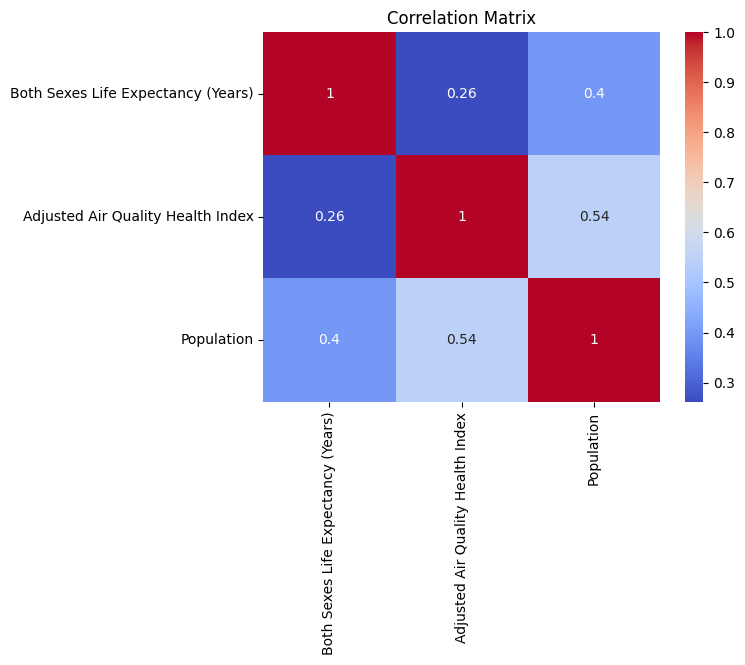

In [ ]:
correlation = df[['Both Sexes Life Expectancy (Years)', 'Adjusted Air Quality Health Index', 'Population']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

There is a positive correlation of 0.26 between life expectancy and AQHI. This is a low positive correlation, meaning that there is a weak but direct relationship: as AQHI increases (worsening air quality), life expectancy tends to increase slightly as well, which is somewhat counterintuitive.

The correlation between life expectancy and population is 0.40, a moderate positive correlation. This suggests that, in larger municipalities, life expectancy tends to be higher.

The strongest relationship here is between AQHI and population, with a correlation of 0.54. This is a moderate positive correlation, indicating that larger municipalities tend to have worse air quality.

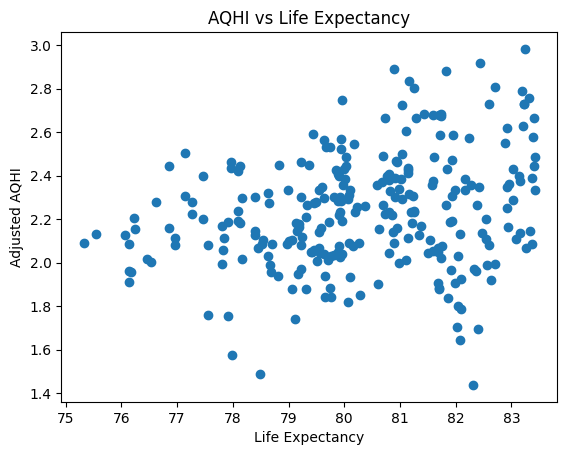

In [ ]:
plt.scatter(df['Both Sexes Life Expectancy (Years)'],df['Adjusted Air Quality Health Index'])
plt.title('AQHI vs Life Expectancy')
plt.ylabel('Adjusted AQHI')
plt.xlabel('Life Expectancy')
plt.show()

The points are scattered, but they appear to be loosely spread out with a slight clustering around certain life expectancy values (around 80–82 years).

There is no clear linear trend between AQHI and life expectancy.



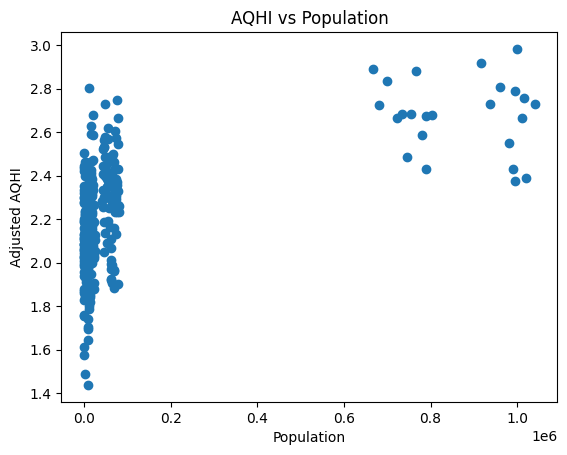

In [ ]:
plt.scatter(df['Population'], df['Adjusted Air Quality Health Index'])
plt.title('AQHI vs Population')
plt.ylabel('Adjusted AQHI')
plt.xlabel('Population')
plt.show()

There are two distinct clusters of data:

Small Populations (close to 0): Most of the points are clustered on the far left near a population of 0, which indicates that many of the municipalities have very small populations. The AQHI for these municipalities generally ranges from 1.4 to 2.6.


Larger Populations (around 1 million): Another cluster is visible on the right, where municipalities with populations closer to 1 million have AQHI values ranging from 2.4 to 3.0. This shows that larger populations tend to have higher AQHI values, indicating worse air quality.

This plot is consistent with the earlier correlation matrix, which showed a moderate positive correlation (0.54) between population and AQHI.

There are a few points in the cluster of smaller populations (left side) with higher AQHI values close to 2.6. These outliers could represent small towns near industrial areas or regions affected by temporary environmental issues (e.g., wildfires or local pollution events).

### Guiding Question

How does population size, life expectancy, influence air quality trends across municipalities?